In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))
#print(x1_label0)
#print(x2_label0)
#blah = np.hstack((x1_label0, x2_label0))
#print(blah.shape)
#print(blah[0][0])
#print(blah[1][0])
#print(blah[0][1])
#print(blah[1][1])

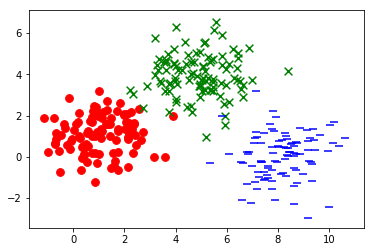

In [3]:
plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

In [4]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))
xs = np.vstack((xs_label0, xs_label1, xs_label2))

In [5]:
print(xs.shape)

(300, 2)


In [6]:
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

In [7]:
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

In [8]:
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))
test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0.,1.]] * 10)
train_size, num_features = xs.shape

In [9]:
print(xs.shape)
print(labels.shape)

(300, 2)
(300, 3)


In [10]:
learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

In [11]:
X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])
W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

In [12]:
cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [13]:
correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [14]:
saver = tf.train.Saver()
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        print (step, err)
    
    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))
    save_path = saver.save(sess, "../models/ch4-softmax-reg-model.ckpt")
    print("Model saved in path: %s" % save_path)

0 109.86121
1 173.41211
2 425.7295
3 424.388
4 69.494576
5 51.045815
6 120.694244
7 59.50544
8 30.927855
9 59.063927
10 39.449364
11 21.846113
12 41.771996
13 33.46692
14 13.818087
15 19.408289
16 30.301512
17 12.514819
18 16.80574
19 27.982033
20 11.970991
21 16.18843
22 26.046207
23 10.920273
24 14.482161
25 24.396551
26 10.756908
27 14.104089
28 22.953274
29 10.2116585
30 13.109938
31 21.777939
32 9.970268
33 12.498337
34 20.762909
35 9.683407
36 11.836837
37 19.91114
38 9.4289055
39 11.232272
40 19.184639
41 9.179489
42 10.66597
43 18.562305
44 8.93932
45 10.147071
46 18.024368
47 8.709857
48 9.677386
49 17.555487
50 8.492967
51 9.255997
52 17.143484
53 8.289582
54 8.879652
55 16.77876
56 8.099864
57 8.543995
58 16.453705
59 7.9234076
60 8.24435
61 16.162247
62 7.75947
63 7.9762154
64 15.899478
65 7.6071424
66 7.7354712
67 15.661419
68 7.4654465
69 7.5184727
70 15.444792
71 7.333416
72 7.322059
73 15.246886
74 7.2101297
75 7.1435122
76 15.065427
77 7.094732
78 6.980511
79 14.898502

904 10.633114
905 2.91572
906 2.9903262
907 10.629793
908 2.91286
909 2.9881833
910 10.626488
911 2.9100137
912 2.9860501
913 10.623192
914 2.9071822
915 2.9839246
916 10.619906
917 2.9043636
918 2.9818108
919 10.616634
920 2.9015594
921 2.979706
922 10.613373
923 2.8987682
924 2.9776123
925 10.610125
926 2.8959892
927 2.9755285
928 10.606887
929 2.8932233
930 2.9734528
931 10.603658
932 2.890469
933 2.9713867
934 10.600446
935 2.8877306
936 2.9693305
937 10.597242
938 2.8850045
939 2.967284
940 10.594051
941 2.8822894
942 2.9652464
943 10.590867
944 2.8795881
945 2.9632165
946 10.587697
947 2.8768983
948 2.9611974
949 10.584538
950 2.8742208
951 2.959187
952 10.581388
953 2.8715563
954 2.9571862
955 10.578252
956 2.8689036
957 2.9551945
958 10.575123
959 2.8662612
960 2.9532092
961 10.572006
962 2.8636336
963 2.9512339
964 10.568903
965 2.861016
966 2.949267
967 10.565806
968 2.8584101
969 2.9473095
970 10.562722
971 2.855816
972 2.9453607
973 10.5596485
974 2.853236
975 2.943419
976 

1764 2.6081915
1765 9.982742
1766 2.4055574
1767 2.6073253
1768 9.981156
1769 2.4043813
1770 2.6064622
1771 9.979576
1772 2.4032066
1773 2.6056004
1774 9.977999
1775 2.4020357
1776 2.6047409
1777 9.976423
1778 2.4008658
1779 2.6038818
1780 9.974851
1781 2.3996978
1782 2.6030273
1783 9.97328
1784 2.3985324
1785 2.6021736
1786 9.971712
1787 2.3973691
1788 2.601322
1789 9.970151
1790 2.3962095
1791 2.6004722
1792 9.968593
1793 2.3950512
1794 2.5996232
1795 9.967035
1796 2.3938956
1797 2.5987768
1798 9.965482
1799 2.3927414
1800 2.5979333
1801 9.963933
1802 2.3915906
1803 2.5970905
1804 9.962383
1805 2.3904402
1806 2.5962505
1807 9.960841
1808 2.3892937
1809 2.5954115
1810 9.959299
1811 2.388149
1812 2.5945761
1813 9.957763
1814 2.3870058
1815 2.5937393
1816 9.956225
1817 2.3858652
1818 2.5929065
1819 9.954696
1820 2.3847256
1821 2.592075
1822 9.953167
1823 2.3835907
1824 2.5912445
1825 9.951641
1826 2.3824558
1827 2.5904179
1828 9.950119
1829 2.3813252
1830 2.5895932
1831 9.948598
1832 2.

2669 2.1252108
2670 2.4118457
2671 9.616509
2672 2.1244547
2673 2.411354
2674 9.61559
2675 2.1237035
2676 2.4108634
2677 9.61467
2678 2.1229503
2679 2.4103732
2680 9.61375
2681 2.122197
2682 2.409886
2683 9.612835
2684 2.1214452
2685 2.4093978
2686 9.611919
2687 2.120694
2688 2.4089096
2689 9.611006
2690 2.1199446
2691 2.4084232
2692 9.610096
2693 2.1191955
2694 2.4079382
2695 9.609185
2696 2.1184483
2697 2.4074543
2698 9.608276
2699 2.1177003
2700 2.406969
2701 9.6073675
2702 2.1169548
2703 2.406485
2704 9.606464
2705 2.1162078
2706 2.406002
2707 9.60556
2708 2.115462
2709 2.4055202
2710 9.604655
2711 2.1147196
2712 2.4050395
2713 9.603755
2714 2.1139767
2715 2.4045596
2716 9.602854
2717 2.1132329
2718 2.4040792
2719 9.601956
2720 2.112492
2721 2.403599
2722 9.60106
2723 2.1117523
2724 2.403122
2725 9.6001625
2726 2.1110115
2727 2.402645
2728 9.599269
2729 2.110272
2730 2.4021673
2731 9.598376
2732 2.1095343
2733 2.4016922
2734 9.597485
2735 2.108797
2736 2.4012163
2737 9.596596
2738 

In [15]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_path)
    print("Model restored.")   
    print(np.argmax(y_model.eval(feed_dict={X: [[6., -2.]], W: W_val, b: b_val}), 1))

Model restored.
[2]
